In [4]:
# Redes
from keras.datasets import fashion_mnist

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Separando em treino, teste e validação
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
# Criando as labels
labels = {
    0:"T-shirt/top",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle boot"
}

for k in range(len(labels)):
    print(k, labels[k])

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


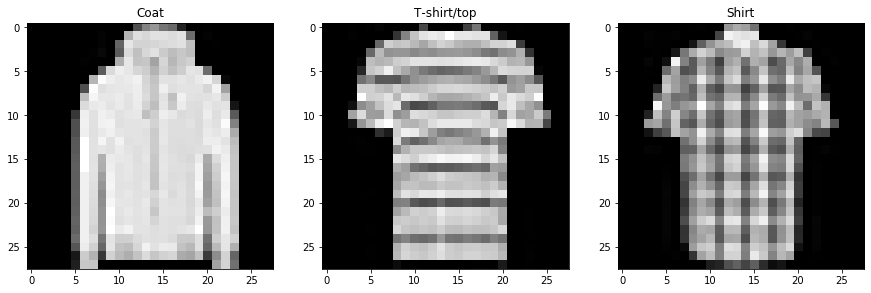

In [8]:
import random
pick = random.randint(0, len(X_train))

fig, axes = plt.subplots(1, 3, figsize=(15,5))
for k in range(3):
    pick = random.randint(0, len(X_train))
    axes[k].imshow(X_train[pick].reshape(28,28), cmap=plt.cm.gray)
    axes[k].set_title(labels[y_train[pick]])
plt.show()

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [11]:
train_x = X_train.reshape(X_train.shape[0], 28, 28, 1)
test_x = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [17]:
# Normalização
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x /= 255
test_x /= 255

In [23]:
nsamples, nx, ny = X_train.shape
d2_train_dataset = X_train.reshape((nsamples,nx*ny))

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(d2_train_dataset, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
n, x, y = X_test.shape
test = X_test.reshape((n,x*y))

In [32]:
pred_rf = rf.predict(test)

print("The accuracy by random forest classifier is: ", rf.score(test, y_test)*100, "%")

The accuracy by random forest classifier is:  10.0 %
